# 1. Basics, Database managment, 5 points

There is a file with the name 'chem_id_pubmed.txt' in the folder with PubChem CIDs. Please, find a way to automatically download SMILES, Fingerprint2D, and MolecularFormula for these molecules. It must be a py-script written according to  PEP-8 with comments. So, it takes as an input argument file-name and returns CSV-file with columns CID, SMILES, Fingerprint2D, and MolecularFormula.

In [19]:
import pubchempy as pcp
import csv
import rdkit
import pandas as pd
from rdkit import Chem

In [20]:
file1 = open("chem_id_pubmed.txt", "r")
# считываем все строки
cids = file1.readlines()
# итерация по строкам
for line in cids:
    print(line.strip())
# закрываем файл
file1.close

459803
91899426
286003
47289
451668
16218924
60961
2051
2126
9810212
135400486
25099184
2303
82146
448949
25150857
53789347
1080352
23891512
9687
264
512282
5943
11345983
2662


<function TextIOWrapper.close()>

In [21]:
smiles_list = list(range(len(cids)))
mol_formula = list(range(len(cids)))
for i in range(len(cids)):
    c = pcp.Compound.from_cid(cids[i])
    smiles_list[i] = c.isomeric_smiles
    mol_formula[i] = c.molecular_formula
#print (smiles_list)
#print (mol_formula)

In [22]:
# create a list of mols
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

# create a list of fingerprints from mols
fps = [Chem.RDKFingerprint(mol) for mol in mols]

In [23]:
df = pd.DataFrame({'CID': cids,
                   'SMILES': smiles_list,
                   'Molecular formula':mol_formula,
                   'Molecule': mols,
                   'Fingerprints':fps})
df.to_csv("output.csv",index=False)

In [24]:
print(df)

            CID                                             SMILES  \
0      459803\n         C1=CC2=C(C3=C(C=C2)C(=O)C(=CN3)C(=O)O)N=C1   
1    91899426\n       C(C(C1=C(C(=C(O1)O)OP(=O)([O-])[O-])[O-])O)O   
2      286003\n     CC1(OC2C(O1)C(OC2C(=O)O)N3C=NC4=C(N=CN=C43)N)C   
3       47289\n                         CN(CCCC(=O)C1=CN=CC=C1)N=O   
4      451668\n         C1[C@@H]([C@H](O[C@H]1N2C=NC(=NC2=O)N)CO)O   
5    16218924\n  CC1=NC(=CC=C1)C2=NN(C=C2C3=CC=NC4=CC=CC=C34)C(...   
6       60961\n  C1=NC(=C2C(=N1)N(C=N2)[C@H]3[C@@H]([C@@H]([C@H...   
7        2051\n      COC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(=CC=C3)Cl)OC   
8        2126\n  CC1(CCC(C2=C1C=CC(=C2)C(=O)NC3=CC=C(C=C3)C(=O)...   
9     9810212\n  C1=CC=C2C(=C1)C(=O)OC23C4=CC(=C(C(=C4OC5=C(C(=...   
10  135400486\n     C1=CC=C2C(=C1)C=CC(=C2/C=N/NC(=O)C3=CC=NC=C3)O   
11   25099184\n  CC1=CC(=NN1)NC2=C(C=C(C(=N2)N[C@@H](C)C3=CC=C(...   
12       2303\n  CC1=C(C(C(=C(N1)C)[N+](=O)[O-])C2=CC=CC=C2C(F)...   
13      82146\n  CC1

# 2. Basics, format convertation, 2 points 

Make SDF-file from the output file from the previous assignment.

In [26]:
from rdkit.Chem import PandasTools
PandasTools.WriteSDF(df, 'output.sdf', molColName = 'Molecule', properties = list(df.columns))
#this_mol = Chem.SDMolSupplier('output.sdf')[0]

In [27]:
file=open('output.sdf',mode="r")
string_list=file.readlines()
for line in string_list:
    print(line.strip())
file.close()


RDKit          2D

18 20  0  0  0  0  0  0  0  0999 V2000
1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
-0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
-1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
-3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
-3.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
-3.0000   -2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
-1.5000   -2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
-5.2500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
-6.0000   -2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
-6.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
-5.2500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
-3.7500    1.2990    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
-7.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
-8.25

-10.5000   -5.1962    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
-9.7500   -6.4952    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
-8.2500   -6.4952    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
-1.5000    5.1962    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
-0.7500    6.4952    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
1.5000    5.1962    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
3.0000    5.1962    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
1  2  1  0
2  3  1  0
3  4  1  0
4  5  1  0
5  6  1  0
6  7  1  0
7  8  1  0
6  9  1  0
9 10  2  0
10 11  1  0
11 12  2  0
12 13  1  0
13 14  2  0
14 15  1  0
15 16  2  0
16 17  1  0
17 18  2  0
17 19  1  0
19 20  1  0
20 21  1  0
21 22  1  0
22 23  1  0
23 24  1  0
24 25  1  0
23 26  1  0
26 27  1  0
27 28  2  0
28 29  1  0
29 30  2  0
30 31  1  0
31 32  2  0
14 33  1  0
33 34  1  0
13 35  1  0
35 36  1  0
8  2  1  0
18  9  1  0
16 11  1  0
25 20  1  0
32 27  1  0
M  END
>  <CID>  (16)
25150857


>  <SMILES>  (16)
CN1CCCN(CC1

# 3. Basics, familiarize with RDKit library, 10

The following assignments must be done in a jupyter notebook
- Depict your molecules
- Calculate similarity of molecules using MACCS Keys, Morgan Fingerprints, and RDKit fingerprint. Plot distribution of similarity values.


In [28]:
from rdkit.Chem import Draw

img=Draw.MolsToGridImage(mols[:25],molsPerRow=2,subImgSize=(500,500))   

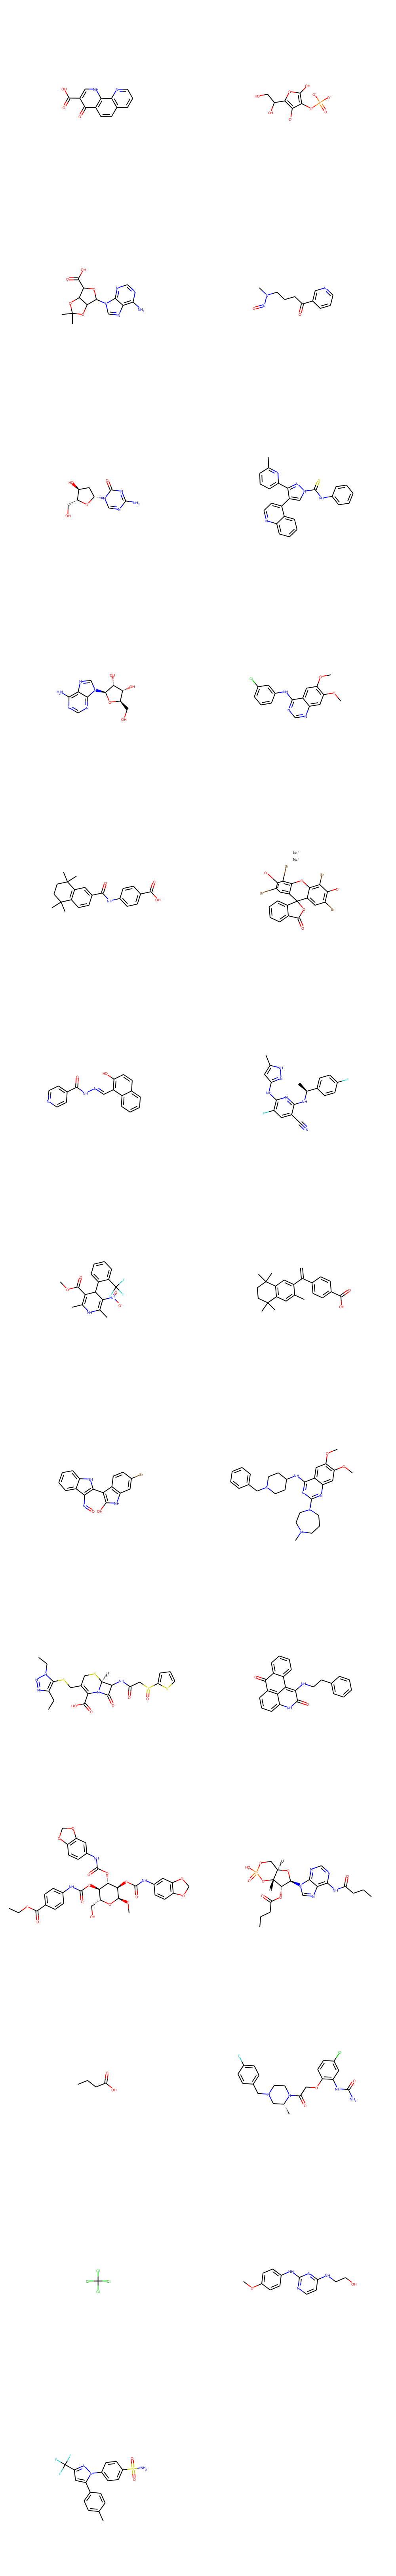

In [29]:
img

In [30]:
from rdkit import DataStructs
for i in range (24):
    print(DataStructs.FingerprintSimilarity(fps[i],fps[i+1]))

0.21779661016949153
0.3282636248415716
0.15949188426252647
0.12679425837320574
0.25846579129232894
0.3830177153329261
0.2773465067043049
0.23591549295774647
0.29701492537313434
0.20641125879593433
0.21895973154362416
0.39662447257383965
0.30414438502673796
0.24413489736070382
0.4001344989912576
0.4262948207171315
0.5119825708061002
0.36069651741293535
0.4058752997601918
0.020818875780707843
0.022020725388601035
0.00261437908496732
0.0
0.17486818980667837


In [31]:
from rdkit.Chem import MACCSkeys
macs = [MACCSkeys.GenMACCSKeys(x) for x in mols]
for i in range (24):
    print(DataStructs.FingerprintSimilarity(macs[i],macs[i+1]))

0.2982456140350877
0.2638888888888889
0.2702702702702703
0.2875
0.35135135135135137
0.4057971014492754
0.43478260869565216
0.3275862068965517
0.2807017543859649
0.3333333333333333
0.3684210526315789
0.3333333333333333
0.28125
0.2
0.37037037037037035
0.4019607843137255
0.4044943820224719
0.47761194029850745
0.5925925925925926
0.20270270270270271
0.1388888888888889
0.058823529411764705
0.019230769230769232
0.25609756097560976


In [32]:
from rdkit.Chem import AllChem
from rdkit import DataStructs
morgan_fp = list(range(len(mols)))
for i in range (24):
    morgan_fp[i] = AllChem.GetMorganFingerprint(mols[i],2)
    print(morgan_fp[i])
print(type (morgan_fp[0]))
for i in range (24):
    DataStructs.DiceSimilarity(morgan_fp[i],morgan_fp[i+1])

<class 'rdkit.DataStructs.cDataStructs.UIntSparseIntVect'>


ArgumentError: Python argument types in
    rdkit.DataStructs.cDataStructs.DiceSimilarity(UIntSparseIntVect, int)
did not match C++ signature:
    DiceSimilarity(RDKit::SparseIntVect<unsigned long long> siv1, RDKit::SparseIntVect<unsigned long long> siv2, bool returnDistance=False, double bounds=0.0)
    DiceSimilarity(RDKit::SparseIntVect<unsigned int> siv1, RDKit::SparseIntVect<unsigned int> siv2, bool returnDistance=False, double bounds=0.0)
    DiceSimilarity(RDKit::SparseIntVect<long long> siv1, RDKit::SparseIntVect<long long> siv2, bool returnDistance=False, double bounds=0.0)
    DiceSimilarity(RDKit::SparseIntVect<int> siv1, RDKit::SparseIntVect<int> siv2, bool returnDistance=False, double bounds=0.0)
    DiceSimilarity(ExplicitBitVect bv1, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > pkl, bool returnDistance=0)
    DiceSimilarity(SparseBitVect bv1, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > pkl, bool returnDistance=0)
    DiceSimilarity(ExplicitBitVect bv1, ExplicitBitVect bv2, bool returnDistance=0)
    DiceSimilarity(SparseBitVect bv1, SparseBitVect bv2, bool returnDistance=0)

# 4. Advanced, code Morgan alghorithm, 20

- It must be py-script written according to  PEP-8 with comments. So, it takes as an input argument a file name and returns a CSV file with a table that contains atomic labels and their numbers. Moreover, it should contain module that visualize a molecule with numbering.

In [33]:
for bond in mols.GetBonds():
    print(bond.GetBeginAtomIdx(),',',
          bond.GetEndAtomIdx())


AttributeError: 'list' object has no attribute 'GetBonds'